# TB Stores by states

![title](img/tb_by_state.png)

# TB Stores by city (in Azizona)

![title](img/tb_by_city.png)

In [1]:
import pandas as pd
import requests
import re
import time
from bs4 import BeautifulSoup as bs
from pprint import pprint

In [2]:
display(HTML("<style>.container { width:100% !important; }</style>"))
css = open('../style-table.css').read() + open('../style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

pd.set_option('display.max_colwidth', 200)


# Visit main page to get store list with urls

In [3]:
#url = 'https://locations.tacobell.com/tx/katy.html'
url = 'https://locations.tacobell.com/index.html'
response = requests.get(url)

response.status_code

200

In [4]:
page = response.text

soup = bs(page)

In [5]:
url_prefix = 'https://locations.tacobell.com/'

In [6]:
re_number = re.compile(r'(\d+)')

states_total = [int(re_number.search(p['data-count']).group(1)) for p in soup.find_all('a', class_ = 'Directory-listLink')]
states_name = [p.text for p in soup.find_all('a', class_ = 'Directory-listLink')]
state_urls = [url_prefix + p['href'] for p in soup.find_all('a', class_ = 'Directory-listLink')]


In [7]:
df_tb_stores_by_state = pd.DataFrame({'state' :  states_name,
             'total_stores' : states_total,
             'url': state_urls})

In [8]:
df_tb_stores_by_state

state  total_stores  \
0          Alabama           130   
1           Alaska            15   
2          Arizona           182   
3         Arkansas           105   
4       California           837   
5         Colorado           151   
6      Connecticut            48   
7         Delaware            15   
8          Florida           445   
9          Georgia           243   
10          Hawaii            29   
11           Idaho            32   
12        Illinois           270   
13         Indiana           239   
14            Iowa            53   
15          Kansas            91   
16        Kentucky           148   
17       Louisiana           134   
18           Maine            20   
19        Maryland            92   
20   Massachusetts            69   
21        Michigan           296   
22       Minnesota            86   
23     Mississippi            83   
24        Missouri           216   
25         Montana            20   
26        Nebraska            42   
27          Nevada            79   
28   New Hampshire            19   
29      New Jersey            95   
30      New Mexico            57   
31        New York           201   
32  North Carolina           248   
33    North Dakota            11   
34            Ohio           376   
35        Oklahoma           111   
36          Oregon           112   
37    Pennsylvania           182   
38    Rhode Island            15   
39  South Carolina           113   
40    South Dakota            16   
41       Tennessee           235   
42           Texas           661   
43            Utah            62   
44         Vermont             5   
45        Virginia           209   
46      Washington           143   
47   Washington DC             1   
48   West Virginia            62   
49       Wisconsin           135   
50         Wyoming            14   

                                                                          url  
0                                      https://locations.tacobell.com/al.html  
1                                      https://locations.tacobell.com/ak.html  
2                                      https://locations.tacobell.com/az.html  
3                                      https://locations.tacobell.com/ar.html  
4                                      https://locations.tacobell.com/ca.html  
5                                      https://locations.tacobell.com/co.html  
6                                      https://locations.tacobell.com/ct.html  
7                                      https://locations.tacobell.com/de.html  
8                                      https://locations.tacobell.com/fl.html  
9                                      https://locations.tacobell.com/ga.html  
10                                     https://locations.tacobell.com/hi.html  
11                                     https://locations.tacobell.com/id.html  
12                                     https://locations.tacobell.com/il.html  
13                                     https://locations.tacobell.com/in.html  
14                                     https://locations.tacobell.com/ia.html  
15                                     https://locations.tacobell.com/ks.html  
16                                     https://locations.tacobell.com/ky.html  
17                                     https://locations.tacobell.com/la.html  
18                                     https://locations.tacobell.com/me.html  
19                                     https://locations.tacobell.com/md.html  
20                                     https://locations.tacobell.com/ma.html  
21                                     https://locations.tacobell.com/mi.html  
22                                     https://locations.tacobell.com/mn.html  
23                                     https://locations.tacobell.com/ms.html  
24                                     https://locations.tacobell.com/mo.html  
25                                     https://locations.tac

In [9]:
df_tb_stores_by_state.sort_values('total_stores', ascending = False, inplace = True)
df_tb_stores_by_state.reset_index(drop = True, inplace = True)

In [10]:
df_tb_stores_by_state.head(5)

state  total_stores                                     url
0  California           837  https://locations.tacobell.com/ca.html
1       Texas           661  https://locations.tacobell.com/tx.html
2     Florida           445  https://locations.tacobell.com/fl.html
3        Ohio           376  https://locations.tacobell.com/oh.html
4    Michigan           296  https://locations.tacobell.com/mi.html

In [11]:
df_tb_stores_by_state.tail(5)

state  total_stores  \
46       Delaware            15   
47        Wyoming            14   
48   North Dakota            11   
49        Vermont             5   
50  Washington DC             1   

                                                                          url  
46                                     https://locations.tacobell.com/de.html  
47                                     https://locations.tacobell.com/wy.html  
48                                     https://locations.tacobell.com/nd.html  
49                                     https://locations.tacobell.com/vt.html  
50  https://locations.tacobell.com/dc/washington/50-massachusetts-ave-ne.html

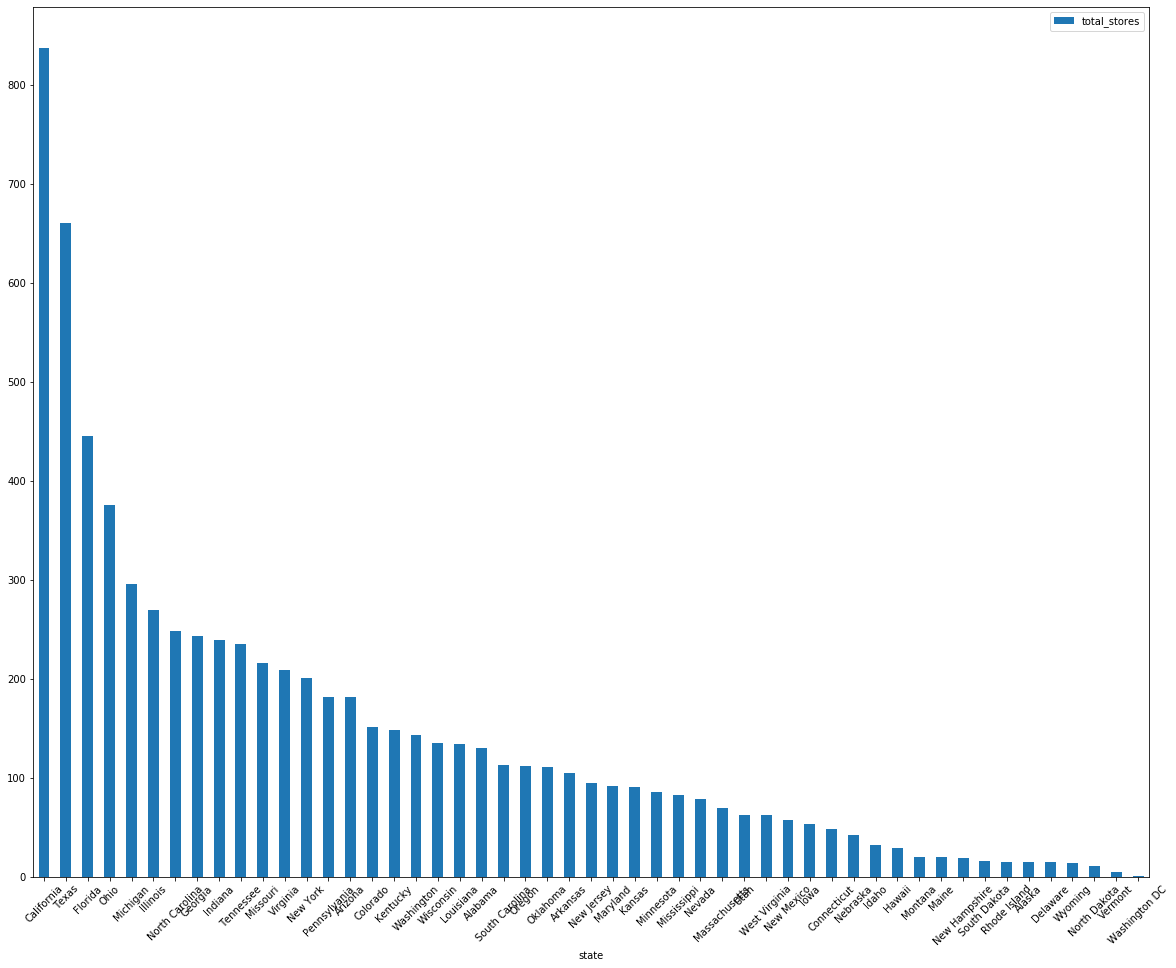

In [12]:
df_tb_stores_by_state.plot.bar(x = 'state', y = 'total_stores',
                              figsize = (20, 16),
                              rot = 45)

# California (800+), Texas (600+), and Florida (400+) are top 3 states with most TB stores. Together they have about 30% of TB stores in US (7200+)

# Now let's dig in to see store counts in each city

In [13]:
def get_page_info(url):
    response = requests.get(url)
    page = response.text
    soup = bs(page)
    
    return soup

In [14]:
state_city_dflist = []

for state, total, url in list(zip(states_name, states_total, state_urls))[:]:
    if total > 1:
        soup = get_page_info(url)
        city_list = [(p.text, int(re_number.search(p.parent['data-count']).group(1)))
                     for p in soup.find_all('span', class_ = 'Directory-listLinkText')]
        #city_count = [int(re_number.search(p.parent['data-count']).group(1)) for p in soup.find_all('span', class_ = 'Directory-listLinkText')]
        
        citydf = pd.DataFrame(city_list, columns = ['city', 'total_stores'])
        citydf['state'] = state

    else:
        citydf = pd.DataFrame([(state, 1, state)], columns = ['city', 'total_stores', 'state'])

    state_city_dflist.append(citydf)        

state_city_df = pd.concat(state_city_dflist)

In [15]:
state_city_df

city  total_stores    state
0        Alabaster             1  Alabama
1      Albertville             1  Alabama
2   Alexander City             1  Alabama
3        Andalusia             1  Alabama
4         Anniston             1  Alabama
..             ...           ...      ...
7          Laramie             1  Wyoming
8          Rawlins             1  Wyoming
9         Riverton             1  Wyoming
10    Rock Springs             1  Wyoming
11        Sheridan             1  Wyoming

[4144 rows x 3 columns]

In [16]:
state_city_df.sort_values('total_stores', ascending = False, inplace = True)
state_city_df.reset_index(drop = True, inplace = True)

## Which city has most TB stores?

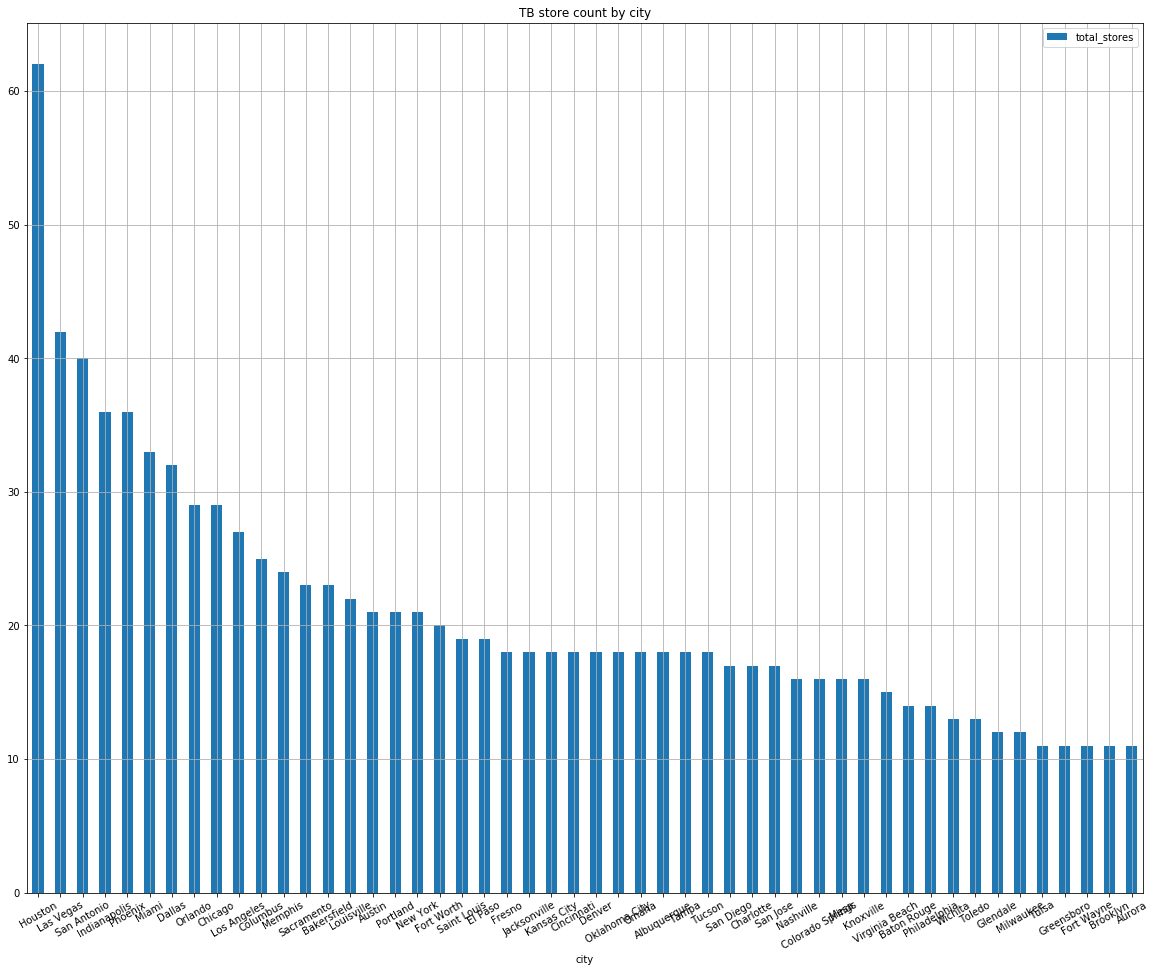

In [18]:
state_city_df.head(50).plot.bar(x = 'city', y = 'total_stores',
                               figsize = (20, 16),
                               rot = 30,
                               grid = True, 
                               title = 'TB store count by city')

In [19]:
state_city_df.shape

(4144, 3)

## Duplicate cities names in different states

In [20]:
dup_city_name = state_city_df[state_city_df.duplicated('city', keep = False)].sort_values(['city', 'state'])
dup_city_name

city  total_stores           state
4053    Abbeville             1       Louisiana
2069    Abbeville             1  South Carolina
4035     Aberdeen             1        Maryland
3586     Aberdeen             1      New Jersey
1534     Aberdeen             1  North Carolina
...           ...           ...             ...
2329         York             1  South Carolina
3847    Yorkville             1        Illinois
1535    Yorkville             1        New York
4101  Youngsville             1       Louisiana
1319  Youngsville             1  North Carolina

[1294 rows x 3 columns]

In [21]:
dup_city_name.loc[dup_city_name.city.isin(dup_city_name.sort_values('total_stores').tail(10).city.unique())]

city  total_stores           state
110       Columbus             6         Georgia
752       Columbus             2         Indiana
857       Columbus             2     Mississippi
3522      Columbus             1        Nebraska
1303      Columbus             1  North Carolina
10        Columbus            25            Ohio
783         Dallas             2         Georgia
2134        Dallas             1          Oregon
2175        Dallas             1    Pennsylvania
6           Dallas            32           Texas
25          Denver            18        Colorado
808         Denver             2  North Carolina
3690       Houston             1        Missouri
0          Houston            62           Texas
2961  Jacksonville             1         Alabama
2841  Jacksonville             1        Arkansas
22    Jacksonville            18         Florida
2641  Jacksonville             1        Illinois
291   Jacksonville             4  North Carolina
1726  Jacksonville             1           Texas
141    Kansas City             6          Kansas
23     Kansas City            18        Missouri
1        Las Vegas            42          Nevada
1214     Las Vegas             1      New Mexico
14      Louisville            22        Kentucky
3351    Louisville             1     Mississippi
1437    Louisville             1            Ohio
5            Miami            33         Florida
1275         Miami             1        Oklahoma
3887      Portland             1         Indiana
4111      Portland             1           Maine
3463      Portland             1        Michigan
16        Portland            21          Oregon
2368      Portland             1       Tennessee
1780      Portland             1           Texas